# Lab 3

## Bài **1**

### Đọc dữ liệu từ file babies.txt

In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv('babies.txt', sep=r'\s+', header=0)

df = pd.DataFrame(data)

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1


### Mô tả dữ liệu bằng các giá trị số

#### **Bước 1:** Lọc dữ liệu và tính các đại lượng
*(Cân nặng của trẻ trong trường hợp bà mẹ hút thuốc khi mang thai và cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc khi mang thai)*

In [23]:
# Create filtered DataFrames for smokers and non-smokers
d1 = df[df['smoke'] == 1]  # smokers
d2 = df[df['smoke'] == 0]  # non-smokers

# Define the index for statistical metrics
index = ['mean', 'std', 'min', 'max', 'var', 'median', 
         'Quantile 0%', 'Quantile 25%', 'Quantile 50%', 
         'Quantile 75%', 'IQR', 'skewness', 'kurtosis']

# Get birth weight (bwt) data for smokers
a = d1['bwt']
x = [
    a.mean(), a.std(), a.min(), a.max(), a.var(), a.median(), 
    a.quantile(0), a.quantile(0.25), a.quantile(0.5), a.quantile(0.75), 
    a.quantile(0.75) - a.quantile(0.25),  # IQR
    a.skew(), a.kurt()
]

# Get birth weight (bwt) data for non-smokers
b = d2['bwt']
y = [
    b.mean(), b.std(), b.min(), b.max(), b.var(), b.median(), 
    b.quantile(0), b.quantile(0.25), b.quantile(0.5), b.quantile(0.75), 
    b.quantile(0.75) - b.quantile(0.25),  # IQR
    b.skew(), b.kurt()
]

# Create the result DataFrame
df_result = pd.DataFrame({
    'smoke': x,
    'nonsmoke': y
}, index=index)

df_result


,smoke,nonsmoke
mean,114.109504,123.047170
std,18.098946,17.398689
min,58.000000,55.000000
max,163.000000,176.000000
var,327.571835,302.714371
median,115.000000,123.000000
Quantile 0%,58.000000,55.000000
Quantile 25%,102.000000,113.000000
Quantile 50%,115.000000,123.000000
Quantile 75%,126.000000,134.000000


#### **Bước 2:** Phân tích dữ liệu dựa trên các đại lượng vừa tính.

##### a. Xét tập dữ liệu ứng với trường hợp bà mẹ có hút thuốc

**Vị trí tập trung của dữ liệu:** khoảng giá trị: $114 - 115$

**Tính biến động của dữ liệu:**
- ***Phương sai (variance):*** $var= 327.571835$
- ***Độ lệch chuẩn (std):*** $std= 18.098946$
- ***Khoảng giá trị:*** $min = 58, max = 163 \to range = 105$
- ***Khoảng cách giữa 2 phần tư vị:*** $IQR = Q_3 - Q_1 = 126 - 102 = 24$

**Nhận xét:** Như vậy dữ liệu phân bố gần nhau.
**Hình dạng phân bố của dữ liệu:**
- ***Độ lệch:*** $Skewness= -0.033700$
- ***Độ bè nhọn của đỉnh dữ liệu:*** $Kurtosis= 0.000408$

**Nhận xét:** Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.

##### b. Xét tập dữ liệu ứng với trường hợp bà mẹ không hút thuốc

**Vị trí tập trung của dữ liệu:** khoảng giá trị: $113$

**Tính biến động của dữ liệu:**
- ***Phương sai (variance):*** $var= 302.714371$
- ***Độ lệch chuẩn (std):*** $std= 17.398689$
- ***Khoảng giá trị:*** $min = 55, max = 176 \to range = 121$
- ***Khoảng cách giữa 2 phần tư vị:*** $IQR = Q_3 - Q_1 = 134 - 113 = 21$

**Nhận xét:** Như vậy dữ liệu phân bố gần nhau.
**Hình dạng phân bố của dữ liệu:**
- ***Độ lệch:*** $Skewness=-0.187363$
- ***Độ bè nhọn của đỉnh dữ liệu:*** $Kurtosis=1.052213$

**Nhận xét:** Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với tốc độ vừa phải.

#### **Bước 3:** So sánh các giá trị thống kê mô tả của hai tập dữ liệu.

**Sự khác biệt về vị trí tập trung dữ liệu:** Chênh lệch khoảng \(123 - 115 = 8\)

**Nhận xét:** Khác biệt không đáng kể.

**Sự khác biệt về tính biến động của dữ liệu được thể hiện qua bảng sau:**

| Thông số      | TH1: Bà mẹ hút thuốc | TH2: Bà mẹ không hút thuốc | Chênh lệch (TH2 - TH1) |
|---------------|----------------------|----------------------------|------------------------|
| Std           | 18.10                | 17.40                      | -0.70                  |
| Var           | 327.57               | 302.71                     | -24.86                 |
| Range         | \(163 - 58 = 105\)   | \(176 - 55 = 121\)         | 16                     |
| IQR           | \(126 - 102 = 24\)   | \(134 - 113 = 21\)         | -3                     |

Dữ liệu trong trường hợp bà mẹ không hút thuốc có phân bố rộng hơn nhưng phần dữ liệu tập trung lại hẹp hơn so với trường hợp bà mẹ có hút thuốc. Sự biến động của dữ liệu trong hai trường hợp không khác biệt nhiều.

**Sự khác biệt về hình dạng phân bố của dữ liệu được thể hiện qua bảng sau:**

| Thông số   | TH1: Bà mẹ hút thuốc   | TH2: Bà mẹ không hút thuốc | Chênh lệch (TH2 - TH1) |
|------------|------------------------|----------------------------|------------------------|
| Skewness   | -0.0336                | -0.1870                    | -0.1534                |
| Kurtosis   | 2.9880                 | 4.0371                     | 1.0490                 |


**$\to$ Nhận xét:** trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái.


### Biểu diễn hình học của dữ liệu

#### Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc

##### Histogram

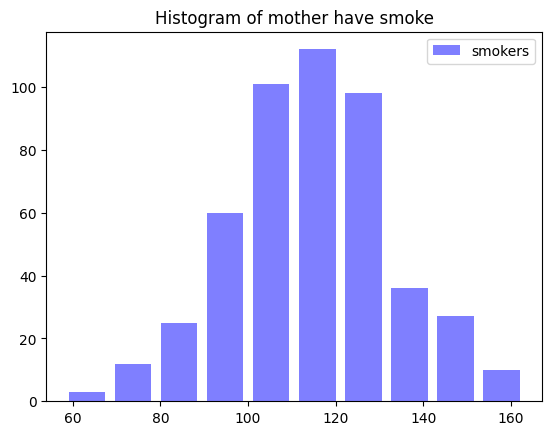

In [31]:
import matplotlib.pyplot as plt

# Create a histogram for birth weight (bwt) data
plt.hist(a, bins=10, alpha=0.5, label='smokers', color='blue', rwidth=0.8)
# plt.hist(b, bins=30, alpha=0.5, label='non-smokers')
plt.legend(loc='upper right')
plt.title('Histogram of mother have smoke')
plt.show()

##### Boxplot

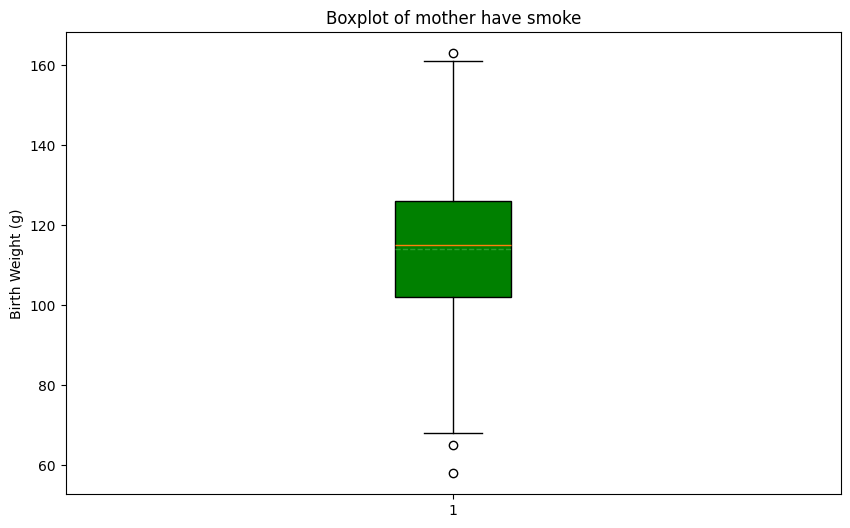

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Create Figure
plt.figure(figsize=(10, 6))

# Create a boxplot for birth weight (bwt) data
plt.boxplot(a, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='green'))

# Add title and labels
plt.title('Boxplot of mother have smoke')
plt.ylabel('Birth Weight (g)')

# Show the plot
plt.show()


#### Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc

##### Histogram

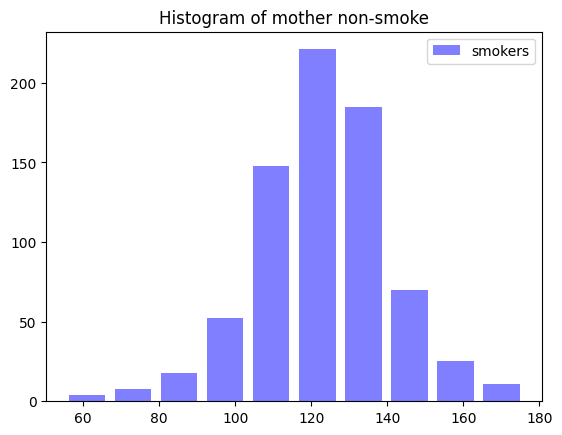

In [39]:
import matplotlib.pyplot as plt

# Create a histogram for birth weight (bwt) data
plt.hist(b, bins=10, alpha=0.5, label='smokers', color='blue', rwidth=0.8)
plt.legend(loc='upper right')
plt.title('Histogram of mother non-smoke')
plt.show()

##### Boxplot

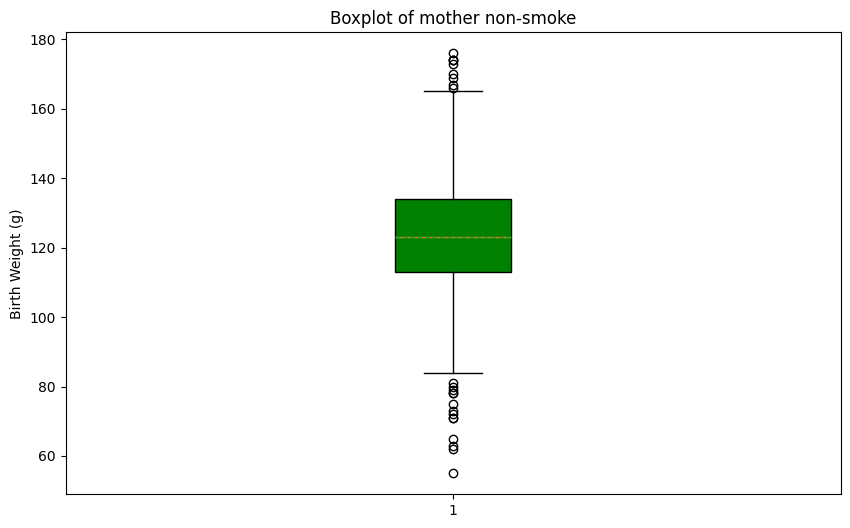

In [42]:
import matplotlib.pyplot as plt

# Create Figure
plt.figure(figsize=(10, 6))

# Create a boxplot for birth weight (bwt) data
plt.boxplot(b, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='green'))

# Add title and labels
plt.title('Boxplot of mother non-smoke')
plt.ylabel('Birth Weight (g)')

# Show the plot
plt.show()

#### So sánh hai tập dữ liệu dựa vào các biểu diễn hình học

##### Histogram

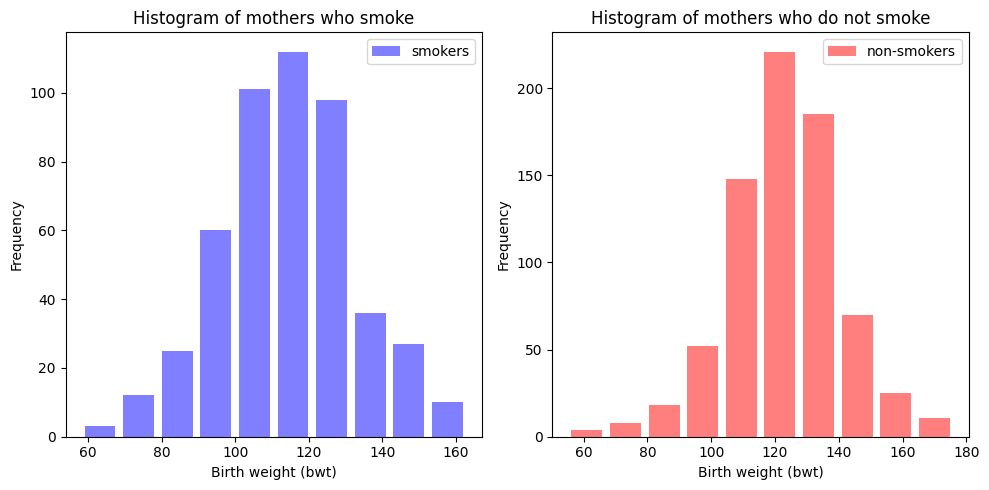

In [44]:
import matplotlib.pyplot as plt

# Create figure and two axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram for birth weight (bwt) data for smokers
ax1.hist(a, bins=10, alpha=0.5, label='smokers', color='blue', rwidth=0.8)
ax1.legend(loc='upper right')
ax1.set_title('Histogram of mothers who smoke')
ax1.set_xlabel('Birth weight (bwt)')
ax1.set_ylabel('Frequency')

# Create a histogram for birth weight (bwt) data for non-smokers
ax2.hist(b, bins=10, alpha=0.5, label='non-smokers', color='red', rwidth=0.8)
ax2.legend(loc='upper right')
ax2.set_title('Histogram of mothers who do not smoke')
ax2.set_xlabel('Birth weight (bwt)')
ax2.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Cân nặng của trẻ trẻ trong trường hợp bà mẹ không hút thuốc cáo hơn so với trường hợp bà mẹ có hút thuốc**
+ Tính biến thiên của 2 tập dữ liệu: tương tự nhau
+ Tính đối xứng của 2 tập dữ liệu: tương tự nhau
+ Giá trị ngoại lệ: cả 2 đều không có giá trị ngoại lệ đáng chú ý.


##### Boxplot

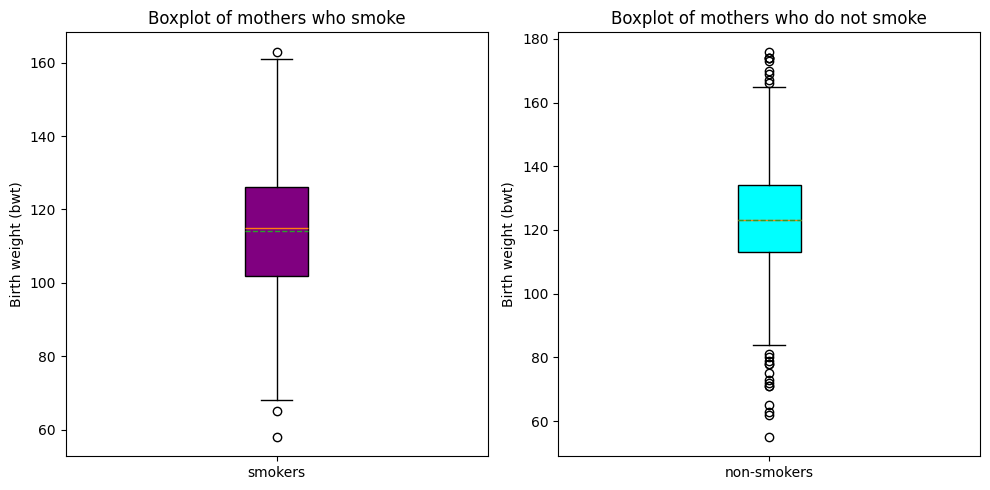

In [48]:
import matplotlib.pyplot as plt

# Create figure and two axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a boxplot for birth weight (bwt) data for smokers
ax1.boxplot(a, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='purple'))
ax1.set_title('Boxplot of mothers who smoke')
ax1.set_ylabel('Birth weight (bwt)')
ax1.set_xticklabels(['smokers'])

# Create a boxplot for birth weight (bwt) data for non-smokers
ax2.boxplot(b, vert=True, patch_artist=True, showmeans=True, meanline=True, boxprops=dict(facecolor='aqua'))
ax2.set_title('Boxplot of mothers who do not smoke')
ax2.set_ylabel('Birth weight (bwt)')
ax2.set_xticklabels(['non-smokers'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Khác biệt về vị trí:** giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115).

**Giá trị ngoại lệ:** cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn.


## Bài **2**